### Análise da potabilidade de água

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
data = pd.read_csv('water_potability.csv')

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [25]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [26]:
data = data.dropna()

In [27]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


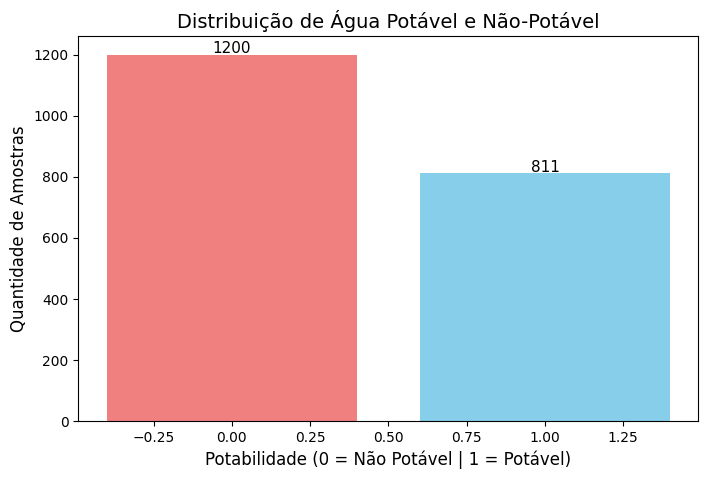

In [29]:
#Contagem de cada categoria (0 = Não potável, 1 = potável)
contagem = data['Potability'].value_counts()

#Criar gráfico
plt.figure(figsize=(8,5))
plt.bar(contagem.index,contagem.values,color=['lightcoral','skyblue'])

# Título e rótulos
plt.title('Distribuição de Água Potável e Não-Potável',fontsize=14)
plt.xlabel('Potabilidade (0 = Não Potável | 1 = Potável)',fontsize=12)
plt.ylabel('Quantidade de Amostras',fontsize=12)

# Adicionar valores acima das barras
for i, valor in enumerate(contagem.values):
    plt.text(i, valor + 5, str(valor), ha='center', fontsize=11)

plt.show()

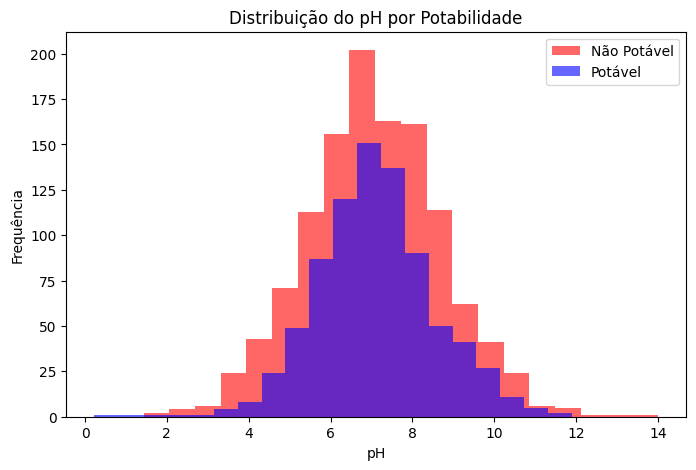

In [30]:
# Separar os dados
ph_nao_potavel = data[data['Potability'] == 0]['ph']
ph_potavel = data[data['Potability'] == 1]['ph']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(ph_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(ph_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição do pH por Potabilidade')
plt.xlabel('pH')
plt.ylabel('Frequência')
plt.legend()
plt.show()


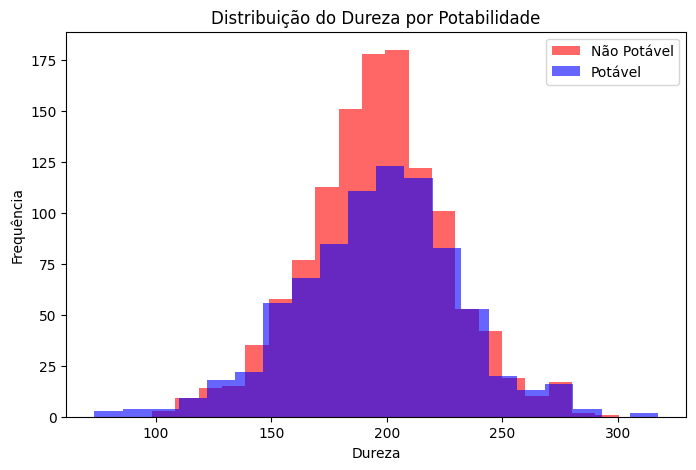

In [31]:
# Separar os dados
hard_nao_potavel = data[data['Potability'] == 0]['Hardness']
hard_potavel = data[data['Potability'] == 1]['Hardness']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(hard_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(hard_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição do Dureza por Potabilidade')
plt.xlabel('Dureza')
plt.ylabel('Frequência')
plt.legend()
plt.show()

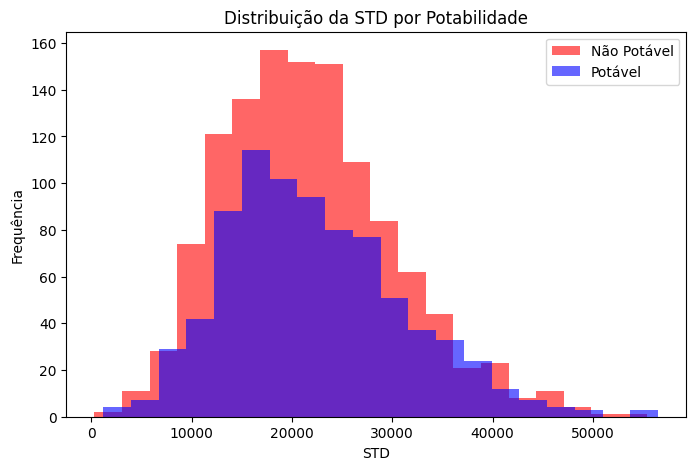

In [32]:
# Separar os dados
solidis_nao_potavel = data[data['Potability'] == 0]['Solids']
solidis_potavel = data[data['Potability'] == 1]['Solids']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(solidis_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(solidis_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição da STD por Potabilidade')
plt.xlabel('STD')
plt.ylabel('Frequência')
plt.legend()
plt.show()

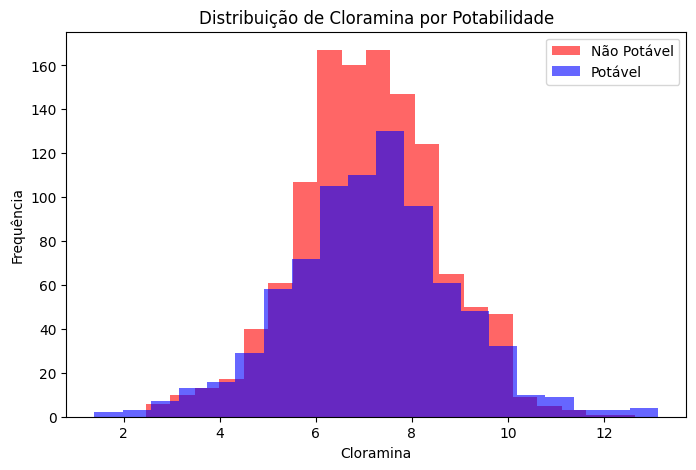

In [33]:
# Separar os dados
chloramines_nao_potavel = data[data['Potability'] == 0]['Chloramines']
chloramines_potavel = data[data['Potability'] == 1]['Chloramines']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(chloramines_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(chloramines_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição de Cloramina por Potabilidade')
plt.xlabel('Cloramina')
plt.ylabel('Frequência')
plt.legend()
plt.show()

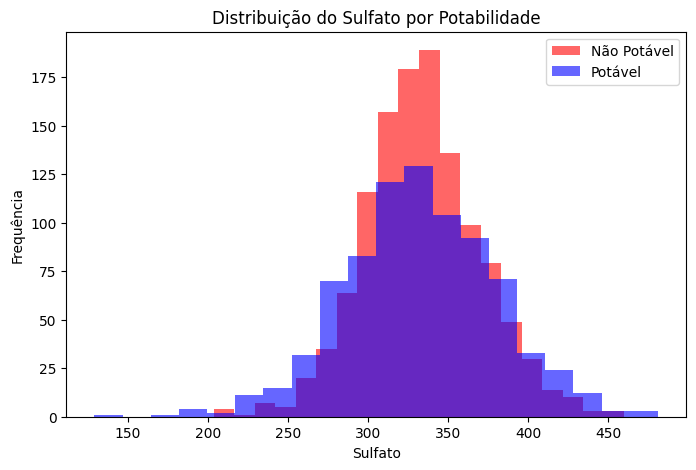

In [34]:
# Separar os dados
sulfate_nao_potavel = data[data['Potability'] == 0]['Sulfate']
sulfate_potavel = data[data['Potability'] == 1]['Sulfate']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(sulfate_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(sulfate_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição do Sulfato por Potabilidade')
plt.xlabel('Sulfato')
plt.ylabel('Frequência')
plt.legend()
plt.show()

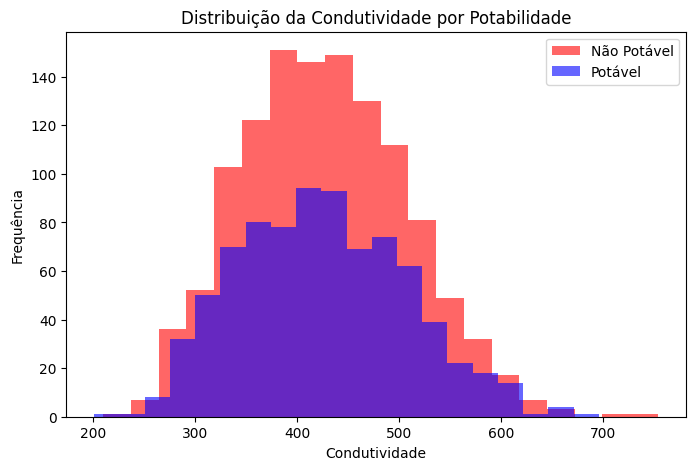

In [35]:
# Separar os dados
conductivity_nao_potavel = data[data['Potability'] == 0]['Conductivity']
conductivity_potavel = data[data['Potability'] == 1]['Conductivity']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(conductivity_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(conductivity_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição da Condutividade por Potabilidade')
plt.xlabel('Condutividade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

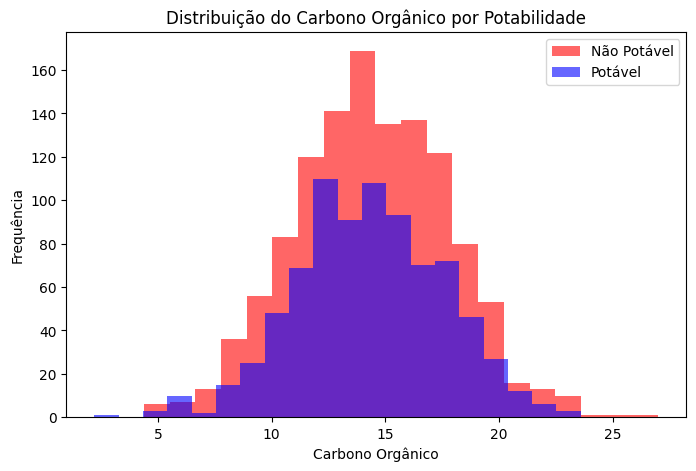

In [36]:
# Separar os dados
oc_nao_potavel = data[data['Potability'] == 0]['Organic_carbon']
oc_potavel = data[data['Potability'] == 1]['Organic_carbon']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(oc_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(oc_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição do Carbono Orgânico por Potabilidade')
plt.xlabel('Carbono Orgânico')
plt.ylabel('Frequência')
plt.legend()
plt.show()

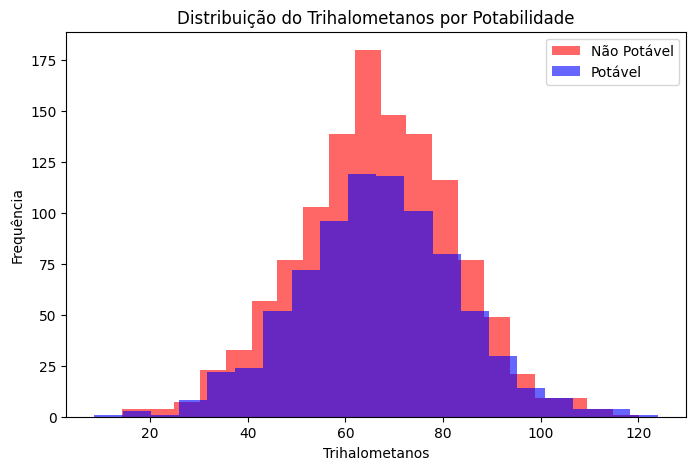

In [37]:
# Separar os dados
tri_nao_potavel = data[data['Potability'] == 0]['Trihalomethanes']
tri_potavel = data[data['Potability'] == 1]['Trihalomethanes']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(tri_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(tri_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição do Trihalometanos por Potabilidade')
plt.xlabel('Trihalometanos')
plt.ylabel('Frequência')
plt.legend()
plt.show()

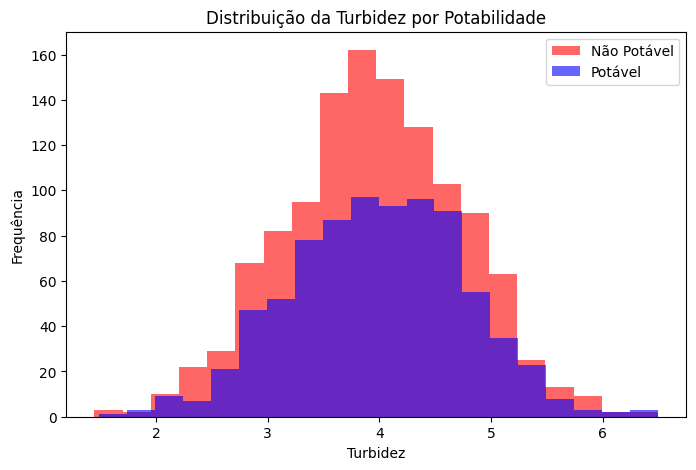

In [38]:
# Separar os dados
tu_nao_potavel = data[data['Potability'] == 0]['Turbidity']
tu_potavel = data[data['Potability'] == 1]['Turbidity']

# Criar o gráfico
plt.figure(figsize=(8,5))
plt.hist(tu_nao_potavel, bins=20, color='red', alpha=0.6, label='Não Potável')
plt.hist(tu_potavel, bins=20, color='blue', alpha=0.6, label='Potável')

plt.title('Distribuição da Turbidez por Potabilidade')
plt.xlabel('Turbidez')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [39]:
# 1) Dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)

# Carregar dados
data = pd.read_csv('water_potability.csv')

#X = data.drop('Potability', axis=1)
#y = data['Potability']

X = np.array(data.drop('Potability', axis=1))
y = np.array(data['Potability'])


# 2) Treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3) Modelo
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    random_state=42,
    min_samples_split=5
)

# 4) Treinar
rf_clf.fit(X_train, y_train)

# 5) Avaliar
y_pred = rf_clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))

# ===== F1-scores =====
f1_bin = f1_score(y_test, y_pred, pos_label=1)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1 (classe positiva=1): {f1_bin:.4f}")
print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")

# ===== Relatório completo =====
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Não Potável', 'Potável']))

# ===== Matriz de confusão =====
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# 6) Importância das variáveis
fi = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportância das variáveis:")
print(fi)



Acurácia: 0.6673448626653102
F1 (classe positiva=1): 0.4372
F1 Macro: 0.6005
F1 Weighted: 0.6366

Relatório de Classificação:
              precision    recall  f1-score   support

 Não Potável       0.67      0.88      0.76       600
     Potável       0.64      0.33      0.44       383

    accuracy                           0.67       983
   macro avg       0.66      0.61      0.60       983
weighted avg       0.66      0.67      0.64       983


Matriz de Confusão:
[[529  71]
 [256 127]]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'